In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.3 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=099db8fe812e94a519100daaf2b82591ffad9802c4e4cdbfc04a0748f101271f
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from PIL import Image
from keras_facenet import FaceNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Parent directory containing subdirectories named after labels
parent_dir = "/content/drive/MyDrive/Colab Notebooks/CS251/manga"

# Load the pre-trained FaceNet model
embedder = FaceNet()

# Function to load an image file
def load_image(file_path):
    img = Image.open(file_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    return np.array(img)

# Function to extract features
def extract_features(parent_directory):
    features = []
    labels = []
    for label_dir in os.listdir(parent_directory):
        full_dir_path = os.path.join(parent_directory, label_dir)
        if os.path.isdir(full_dir_path):
            for img_name in os.listdir(full_dir_path):
                img_path = os.path.join(full_dir_path, img_name)
                img = load_image(img_path)
                embeddings = embedder.embeddings([img])
                if embeddings.size > 0:  # Check if embeddings were successfully generated
                    features.append(embeddings[0])
                    labels.append(label_dir)
    return features, labels

# Load and process the images
features, labels = extract_features(parent_dir)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)


1/1 [==============================] - 0s 150ms/step


In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'angry': 0, 'crying': 1, 'embarrassed': 2, 'happy': 3, 'pleased': 4, 'sad': 5, 'shock': 6}


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(np.array(features), labels_categorical, test_size=0.17, random_state=42)

# Define MLP model using Keras with added Batch Normalization and L2 Regularization
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax activation
])

# Compile the model with a reduced learning rate
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=399, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Epoch 1/399
3/3 [==============================] - 3s 221ms/step - loss: 9.0774 - accuracy: 0.1406 - val_loss: 7.8709 - val_accuracy: 0.1410
Epoch 2/399
3/3 [==============================] - 0s 37ms/step - loss: 8.6692 - accuracy: 0.1645 - val_loss: 7.8211 - val_accuracy: 0.2051
Epoch 3/399
3/3 [==============================] - 0s 33ms/step - loss: 8.4718 - accuracy: 0.2016 - val_loss: 7.7688 - val_accuracy: 0.1923
Epoch 4/399
3/3 [==============================] - 0s 46ms/step - loss: 8.3302 - accuracy: 0.2361 - val_loss: 7.7159 - val_accuracy: 0.1923
Epoch 5/399
3/3 [==============================] - 0s 46ms/step - loss: 8.0424 - accuracy: 0.2706 - val_loss: 7.6629 - val_accuracy: 0.1923
Epoch 6/399
3/3 [==============================] - 0s 42ms/step - loss: 7.9452 - accuracy: 0.2759 - val_loss: 7.6090 - val_accuracy: 0.1923
Epoch 7/399
3/3 [==============================] - 0s 45ms/step - loss: 7.9863 - accuracy: 0.2759 - val_loss: 7.5549 - val_accuracy: 0.1923
Epoch 8/399
3/3 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


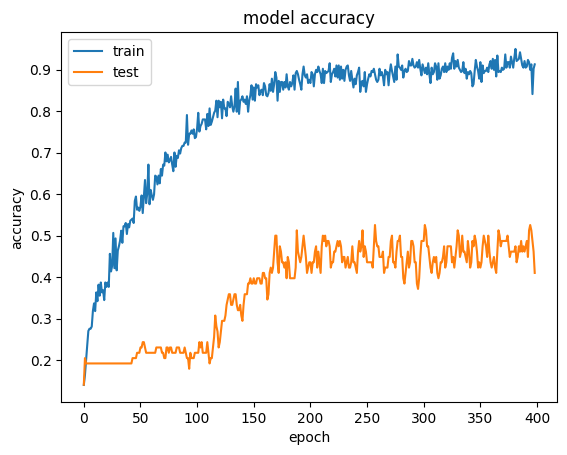

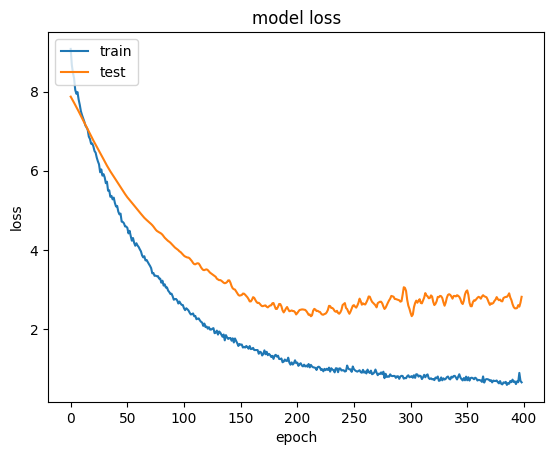

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/models/testingg'

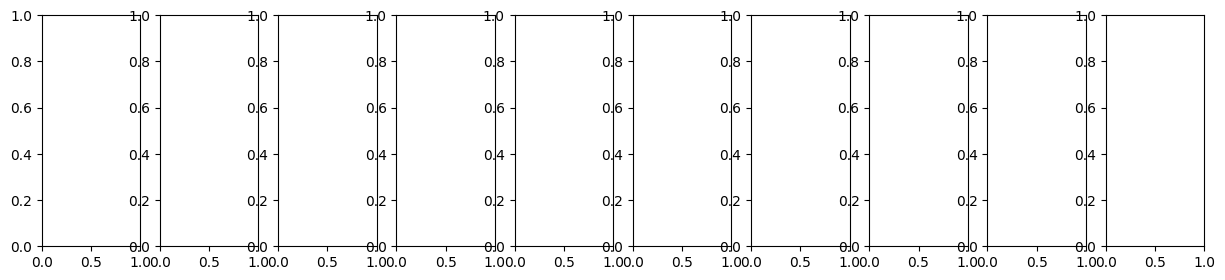

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model2 = load_model('/content/drive/MyDrive/Colab Notebooks/CS251/best_v2.keras')

# Load the pre-trained FaceNet model for embedding
embedder = FaceNet()

# Directory for test images (or use a subset of your existing dataset)
test_dir = "/content/drive/MyDrive/models/testingg"

# Label encoder (assuming you have saved this object during training, or recreate it)
labels = ['angry', 'crying', 'embarrassed','happy','pleased','sad','shock']  # Replace with your actual labels
le = LabelEncoder()
le.fit(labels)

# Function to load and preprocess an image
def load_and_preprocess_image(file_path):
    img = Image.open(file_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((160, 160))  # Resize to fit FaceNet expected input dimensions
    img_array = np.array(img)
    embeddings = embedder.embeddings([img_array])
    return img_array, embeddings[0]  # Return both image and embeddings

# Function to predict the class of an image
def predict_image_class(image_embedding):
    image_embedding = np.expand_dims(image_embedding, axis=0)  # Add batch dimension
    predictions = model.predict(image_embedding)
    class_idx = np.argmax(predictions)
    return le.inverse_transform([class_idx])[0], np.max(predictions)

# Plotting predictions
def plot_predictions(directory, num_images=10):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))
    files = os.listdir(directory)
    selected_files = np.random.choice(files, num_images, replace=False)

    for i, file in enumerate(selected_files):
        img_path = os.path.join(directory, file)
        img, embedding = load_and_preprocess_image(img_path)
        predicted_label, confidence = predict_image_class(embedding)
        actual_label = file.split('_')[0]  # Assuming filename starts with label

        axs[i].imshow(img)
        axs[i].set_title(f'Pred: {predicted_label}')
        axs[i].axis('off')

    plt.show()

# Call the function to plot predictions
plot_predictions(test_dir)

1/1 [==============================] - 0s 18ms/step


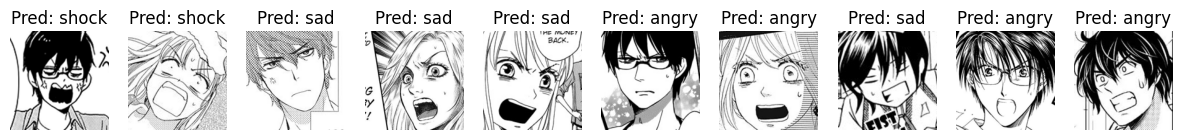

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the saved model
model2 = load_model('/content/drive/MyDrive/models/best_v2.keras')

# Load the pre-trained FaceNet model for embedding
embedder = FaceNet()

# Directory for test images (or use a subset of your existing dataset)
test_dir = "/content/drive/MyDrive/models/testingg"

# Label encoder (assuming you have saved this object during training, or recreate it)
labels = ['angry', 'crying', 'embarrassed','happy','pleased','sad','shock']  # Replace with your actual labels
le = LabelEncoder()
le.fit(labels)

# Function to load and preprocess an image
def load_and_preprocess_image(file_path):
    img = Image.open(file_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img = img.resize((160, 160))  # Resize to fit FaceNet expected input dimensions
    img_array = np.array(img)
    embeddings = embedder.embeddings([img_array])
    return img_array, embeddings[0]  # Return both image and embeddings

# Function to predict the class of an image
def predict_image_class(image_embedding):
    image_embedding = np.expand_dims(image_embedding, axis=0)  # Add batch dimension
    predictions = model.predict(image_embedding)
    class_idx = np.argmax(predictions)
    return le.inverse_transform([class_idx])[0], np.max(predictions)

# Plotting predictions
def plot_predictions(directory, num_images=10):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))
    files = os.listdir(directory)
    selected_files = np.random.choice(files, num_images, replace=False)

    for i, file in enumerate(selected_files):
        img_path = os.path.join(directory, file)
        img, embedding = load_and_preprocess_image(img_path)
        predicted_label, confidence = predict_image_class(embedding)
        actual_label = file.split('_')[0]  # Assuming filename starts with label

        axs[i].imshow(img)
        axs[i].set_title(f'Pred: {predicted_label}')
        axs[i].axis('off')

    plt.show()

# Call the function to plot predictions
plot_predictions(test_dir)